In [7]:
#python version 3.11.4  conda version 23.7.3

In [8]:
#conda install pydantic= 1.10.2

In [9]:
import numpy as np # version 1.24.3
import sklearn # v 0.0.3
import pandas as pd #v 1.5.3
import matplotlib.pyplot as plt # 3.7.1
import statsmodels.api as sm #0.14.0
import sweetviz as sv #my_report = sv.analyze(mydataframe)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

%matplotlib inline

In [10]:
chs = pd.read_csv(r"/Users/thomassniezek/Downloads/California_Houses.csv") #r tells it to run row file path

In [11]:
chs.shape, chs.columns, chs.dtypes # this code tells how many columns there are, the names of the columns and the type each column is. It also says how many rows, there are 20640 rows in this df.  

((20640, 14),
 Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
        'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
        'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
        'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
       dtype='object'),
 Median_House_Value          float64
 Median_Income               float64
 Median_Age                    int64
 Tot_Rooms                     int64
 Tot_Bedrooms                  int64
 Population                    int64
 Households                    int64
 Latitude                    float64
 Longitude                   float64
 Distance_to_coast           float64
 Distance_to_LA              float64
 Distance_to_SanDiego        float64
 Distance_to_SanJose         float64
 Distance_to_SanFrancisco    float64
 dtype: object)

In [12]:
chs.isna().sum() #tells what is missing and how many. In this case 0. 

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [13]:
chs.head # This shows the first 5 rows of all 14 columns

<bound method NDFrame.head of        Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616  

In [14]:
chs.tail #this shows the final 5 rows

<bound method NDFrame.tail of        Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616  

In [15]:
chs.describe() # This returns the summary like statistics including the count, mean, standard deviation min and values at 25%, 50%, 75% and the max value

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


C:\Users\rodge\AppData\Local\Temp\ipykernel_1612\4292345088.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


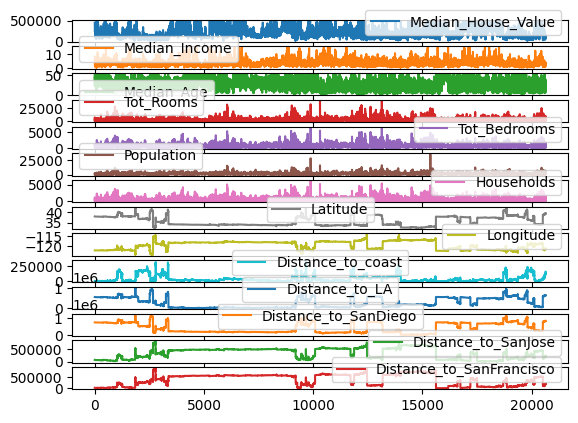

In [16]:
chs.plot(subplots=True)
plt.tight_layout()
plt.show()
# This plots the data with subplots. plt.tight_layout maxes axes height small enough to accommodate all axes values. plt.show shows the plots. 

In [17]:
my_report = sv.analyze(chs)
my_report.show_html('report.html')
# shows the sweetviz analysis as an html and opens in a new page. 

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
# we do not have any object fields that need to be dropped

In [19]:
#random_states splits data set in a specific way so everyone can split it the same way, used to replicate things. Splits data set in same exact way. 

In [20]:
y = chs['Median_House_Value'] #sets the y as median house value

In [21]:
X= chs.loc[:, chs.columns != 'Median_House_Value'] #Says that I want all of the values except for Median_House_Value

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [23]:
model = LinearRegression() #creates the linear regression class

In [24]:
model.fit(X_train,y_train) #fits the training group

LinearRegression()

In [25]:
model.coef_ #coefficient for each column, 13 since we took out median house value. 

array([ 3.91026035e+04,  9.25344684e+02, -5.36758605e+00,  9.70916548e+01,
       -3.76681367e+01,  4.80390487e+01, -4.42288021e+04, -2.73144391e+04,
       -2.41207515e-01, -1.51523713e-01,  2.50584246e-01,  1.50881148e-01,
       -1.21247636e-01])

In [26]:
print(model.intercept_, model.coef_,model.score(X_test, y_test)) # the model.score gives you the R-squared value

-1724369.6259190196 [ 3.91026035e+04  9.25344684e+02 -5.36758605e+00  9.70916548e+01
 -3.76681367e+01  4.80390487e+01 -4.42288021e+04 -2.73144391e+04
 -2.41207515e-01 -1.51523713e-01  2.50584246e-01  1.50881148e-01
 -1.21247636e-01] 0.6463244278208792


In [27]:
y_pred = model.predict(X_test)

In [28]:
MAE = mean_absolute_error(y_test,y_pred) # creates the mean absolute error formula value

In [29]:
MSE = mean_squared_error(y_test,y_pred) # creates the mean squared error formula value

In [30]:
MAPE =  mean_absolute_percentage_error(y_test,y_pred) # creates the mean absolute percentage error formula value

In [31]:
MSE, MAE,MAPE # these are the error metrics for the test. 

(4717721609.741197, 50096.27347364831, 0.2908678862228744)

In [32]:
# the statsmodels is not needed for the Homework as machine learning only needs the values not the whole tables behind it. 

In [33]:
X_train = sm.add_constant(X_train)

In [34]:
newModel = sm.OLS(y_train, X_train).fit()

In [35]:
print(newModel.summary()) #shows the regression results for OLS

                            OLS Regression Results                            
Dep. Variable:     Median_House_Value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2030.
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:48:54   Log-Likelihood:            -1.8139e+05
No. Observations:               14448   AIC:                         3.628e+05
Df Residuals:                   14434   BIC:                         3.629e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [36]:
yprediction = newModel.predict(X_train) 

In [37]:
newModel.params #Predicts the new parameters for the model

const                      -1.724370e+06
Median_Income               3.910260e+04
Median_Age                  9.253447e+02
Tot_Rooms                  -5.367586e+00
Tot_Bedrooms                9.709165e+01
Population                 -3.766814e+01
Households                  4.803905e+01
Latitude                   -4.422880e+04
Longitude                  -2.731444e+04
Distance_to_coast          -2.412075e-01
Distance_to_LA             -1.515237e-01
Distance_to_SanDiego        2.505842e-01
Distance_to_SanJose         1.508811e-01
Distance_to_SanFrancisco   -1.212476e-01
dtype: float64